# Proyecto Machine Learning
+ # Bank Customer Churn Detection
![imagen](../img/img2.png)
+ ## **Exploración y procesamiento del Dataset:** [Kaggle - Bank Customer Data for Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

# 1. Librerías necesarias

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Leemos el Dataset original "Customer-Churn-Records.csv"

In [44]:
df = pd.read_csv("../data_raw/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

El Dataset Original consta de 10.000 registros de clientes. No hay valores nulos.

In [46]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# 3. Exploración inicial

### 3.1. Como se distribuye el target `Exited`:

,count
Exited,
0,7962
1,2038


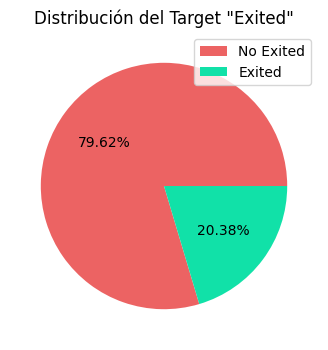

In [47]:
colores = ['#ec6363', '#11e1a8']
plt.figure(figsize=(4,4))
plt.pie(df['Exited'].value_counts(),
        autopct='%1.2f%%',
        colors=colores)
plt.title('Distribución del Target "Exited"')
plt.legend(['No Exited', 'Exited'], loc='upper right');

exited_situacion = pd.DataFrame(df["Exited"].value_counts())
exited_situacion

El Target **Exited** está desbalanceado. Tenemos más registros de clientes que no han salido del banco. Esto supone un inconvenientes para el aprendizaje de los modelos de Machine Learning.

### 3.2. Eliminamos las features que no tendrán relevacia para el proyecto.

In [48]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [49]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

### 3.3. Visualizaciones iniciales del Dataset.

3.3.1. Análisis univariante para visualizar como se comportan la features según el target `Exited`.

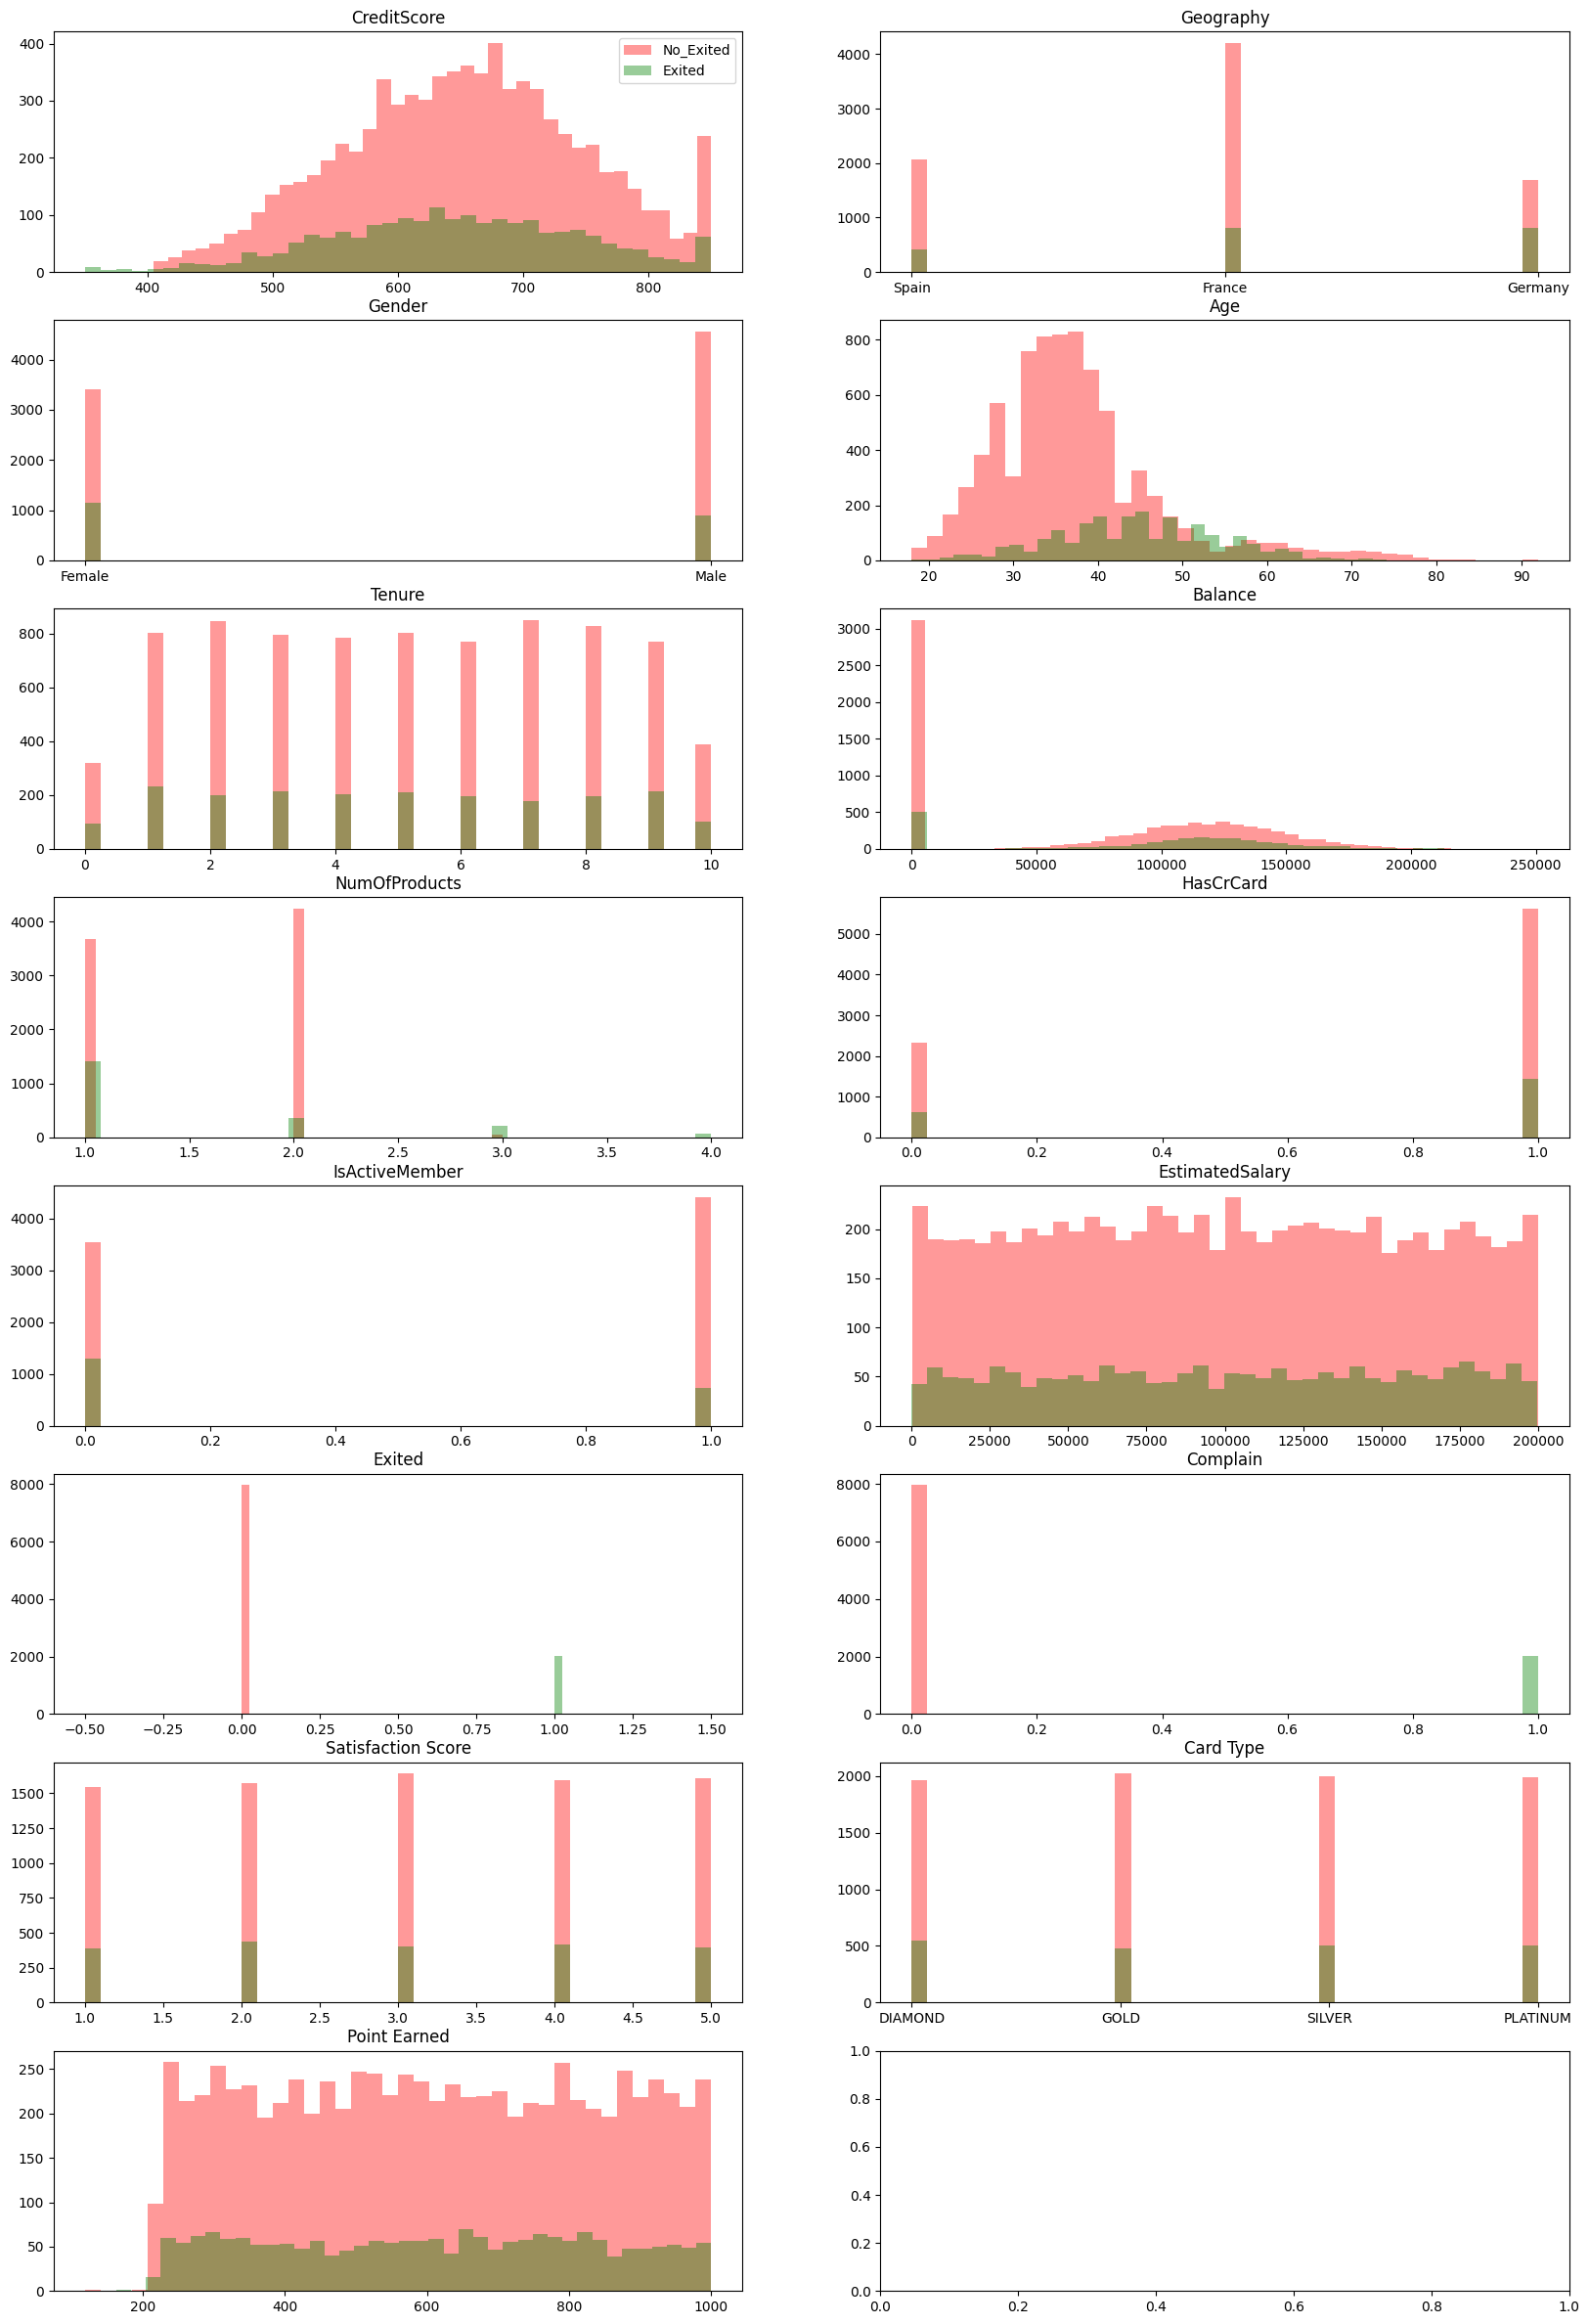

In [50]:
fig, axis = plt.subplots(8,2, figsize=(20,30))

No_Exited = df[df['Exited']==0]
Exited = df[df['Exited']==1]
axes = axis.ravel()
for i in range(len(df.columns)):
    axes[i].hist(No_Exited.values[:,i], bins=40, color='r', alpha=0.4)
    axes[i].hist(Exited.values[:,i], bins=40, color='g', alpha=0.4)
    axes[i].set_title(df.columns[i])

axes[0].legend(['No_Exited', 'Exited']);

3.3.2. Análisis de correlación de las variables respecto al target `Exited`.

- Situamos el target al final del Dataset para visualizar mejor la correlación de las variables respecto al target.

In [51]:
df = df.assign(Exited=df.pop('Exited'))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


- Heatmap del Dataset inicial:

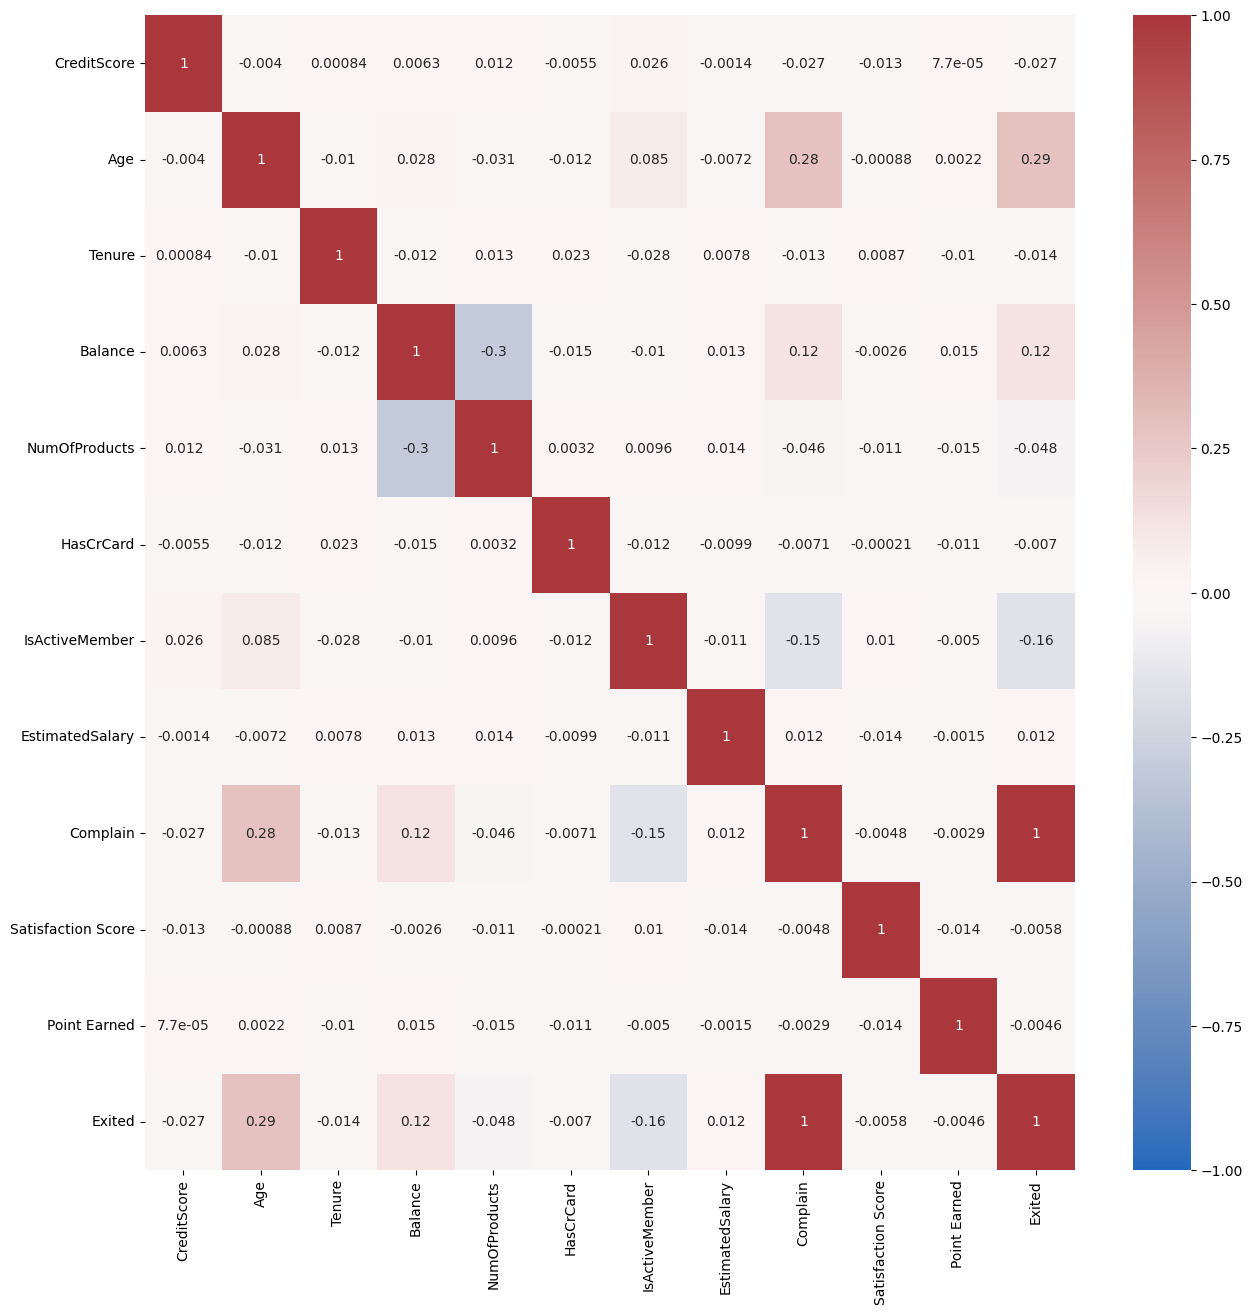

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only= True),
           vmin=-1,
           vmax=1,
           cmap=sns.color_palette("vlag", as_cmap=True),
           annot=True);

- En este heatmap se puede ver como dos de las variables tienen correlaciones significativas: Age y Complain con un 0,29 y 1 respectivamente.
- Debemos tener en cuenta la fuerte correlación de Complain, la cual explica los mismo que `Exited`.

# 4. Procesamiento de datos.

### 4.1. Eliminamos la variable Complain, para poder trabajar con un modelo que no dependa exclusivamente de esta variable en sus predicciones.

In [53]:
df.drop(columns = ["Complain"], inplace = True)

### 4.2. Trabajamos las variables para mejorara el Dataset de cara al proyecto de ML.

In [54]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
Exited                  int64
dtype: object

4.2.1. Gender

In [55]:
print(df["Gender"].unique())
gender_mapping = {'Male': 0, 'Female': 1}
df["Gender"] = df["Gender"].map(gender_mapping)
print(df["Gender"].unique())

['Female' 'Male']
[1 0]


In [56]:
Gender_Exited = df.groupby(['Gender', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
Gender_Exited['Total'] = Gender_Exited.sum(axis=1)
Gender_Exited['Mean Exited = 1'] = round((Gender_Exited['Exited=1']) / Gender_Exited['Total'],4)
Gender_Exited

Exited,Exited=0,Exited=1,Total,Mean Exited = 1
Gender,,,,
0,4558,899,5457,0.1647
1,3404,1139,4543,0.2507


4.2.2. Age

In [57]:
Age_Exited = df.groupby(['Age', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
Age_Exited['Total'] = Age_Exited.sum(axis=1)
Age_Exited

Exited,Exited=0,Exited=1,Total
Age,,,
18,20.0,2.0,22.0
19,26.0,1.0,27.0
20,38.0,2.0,40.0
21,50.0,3.0,53.0
22,72.0,12.0,84.0
...,...,...,...
83,1.0,NaN,1.0
84,1.0,1.0,2.0
85,1.0,NaN,1.0


In [58]:
df["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [59]:
age_mapping = {
    tuple(np.arange(18, 26)): 0,
    tuple(np.arange(26, 36)): 1,
    tuple(np.arange(36, 46)): 2,
    tuple(np.arange(46, 61)): 3,
    tuple(np.arange(61, 100)): 4
}

df['Age Category'] = df['Age'].map(lambda x: next((v for r, v in age_mapping.items() if x in r), x))


In [60]:
Age_Exited = df.groupby(['Age Category', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
Age_Exited['Total'] = Age_Exited.sum(axis=1)
Age_Exited['Mean Exited = 1'] = round((Age_Exited['Exited=1']) / Age_Exited['Total'],4)
Age_Exited

Exited,Exited=0,Exited=1,Total,Mean Exited = 1
Age Category,,,,
0,565,46,611,0.0753
1,3241,301,3542,0.0850
2,3002,734,3736,0.1965
3,805,842,1647,0.5112
4,349,115,464,0.2478


4.2.3. Credit Score

In [61]:
CS_Exited = df.groupby(['CreditScore', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
CS_Exited['Total'] = CS_Exited.sum(axis=1)
CS_Exited

Exited,Exited=0,Exited=1,Total
CreditScore,,,
350,NaN,5.0,5.0
351,NaN,1.0,1.0
358,NaN,1.0,1.0
359,NaN,1.0,1.0
363,NaN,1.0,1.0
...,...,...,...
846,3.0,2.0,5.0
847,4.0,2.0,6.0
848,5.0,NaN,5.0


In [62]:
credit_score_mapping = {
    tuple(np.arange(350, 451)): 0,
    tuple(np.arange(451, 551)): 1,
    tuple(np.arange(551, 651)): 2,
    tuple(np.arange(651, 751)): 3,
    tuple(np.arange(751, 851)): 4
}

df['CreditScore Category'] = df['CreditScore'].map(lambda x: next((v for r, v in credit_score_mapping.items() if x in r), x))


In [63]:
CS_Exited = df.groupby(['CreditScore Category', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
CS_Exited['Total'] = CS_Exited.sum(axis=1)
CS_Exited['Mean Exited = 1'] = round((CS_Exited['Exited=1']) / CS_Exited['Total'], 4)
CS_Exited

Exited,Exited=0,Exited=1,Total,Mean Exited = 1
CreditScore Category,,,,
0,128,61,189,0.3228
1,1125,307,1432,0.2144
2,2627,689,3316,0.2078
3,2798,667,3465,0.1925
4,1284,314,1598,0.1965


4.2.4. NumOfProducts

In [64]:
print(df["NumOfProducts"].unique())
NumOfProducts_mapping = {1: 0, 2:0, 3:1 , 4:1}
df['NumOfProducts'] = df['NumOfProducts'].map(NumOfProducts_mapping)
print(NumOfProducts_mapping)

[1 3 2 4]
{1: 0, 2: 0, 3: 1, 4: 1}


In [65]:
Nop_Exited = df.groupby(['NumOfProducts', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
Nop_Exited['Total'] = Nop_Exited.sum(axis=1)
Nop_Exited['Mean Exited = 1'] = round((Nop_Exited['Exited=1']) / Nop_Exited['Total'],4)
Nop_Exited

Exited,Exited=0,Exited=1,Total,Mean Exited = 1
NumOfProducts,,,,
0,7916,1758,9674,0.1817
1,46,280,326,0.8589


4.2.5. Geography

In [66]:
Geo_Exited = df.groupby(['Geography', 'Exited']).size().unstack().rename(columns={0: 'Exited=0', 1: 'Exited=1'})
Geo_Exited['Total'] = Geo_Exited.sum(axis=1)
Geo_Exited['Mean Exited = 1'] = round((Geo_Exited['Exited=1']) / Geo_Exited['Total'],4)
Geo_Exited

Exited,Exited=0,Exited=1,Total,Mean Exited = 1
Geography,,,,
France,4203,811,5014,0.1617
Germany,1695,814,2509,0.3244
Spain,2064,413,2477,0.1667


In [67]:
print(df["Geography"].unique())
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
df['Geography'] = df['Geography'].map(geography_mapping)
print(geography_mapping)

['France' 'Spain' 'Germany']
{'France': 0, 'Spain': 1, 'Germany': 2}


4.2.6. Card Type

In [68]:
print(df["Card Type"].unique())
card_type_mapping = {'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}
df['Card Type'] = df['Card Type'].map(card_type_mapping)
print(card_type_mapping)

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
{'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}


4.2.7. Situamos `Exited` al final tras las nuevas variables.

In [69]:
df = df.assign(Exited=df.pop('Exited'))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
0,619,0,1,42,2,0.00,0,1,1,101348.88,2,0,464,2,2,1
1,608,1,1,41,1,83807.86,0,0,1,112542.58,3,0,456,2,2,0
2,502,0,1,42,8,159660.80,1,1,0,113931.57,3,0,377,2,1,1
3,699,0,1,39,1,0.00,0,0,0,93826.63,5,1,350,2,3,0
4,850,1,1,43,2,125510.82,0,1,1,79084.10,5,1,425,2,4,0


# 5. Exploración final del Dataset

### 5.1. Visualizamos la matriz de correlacion para ver como afectan las variables al target.

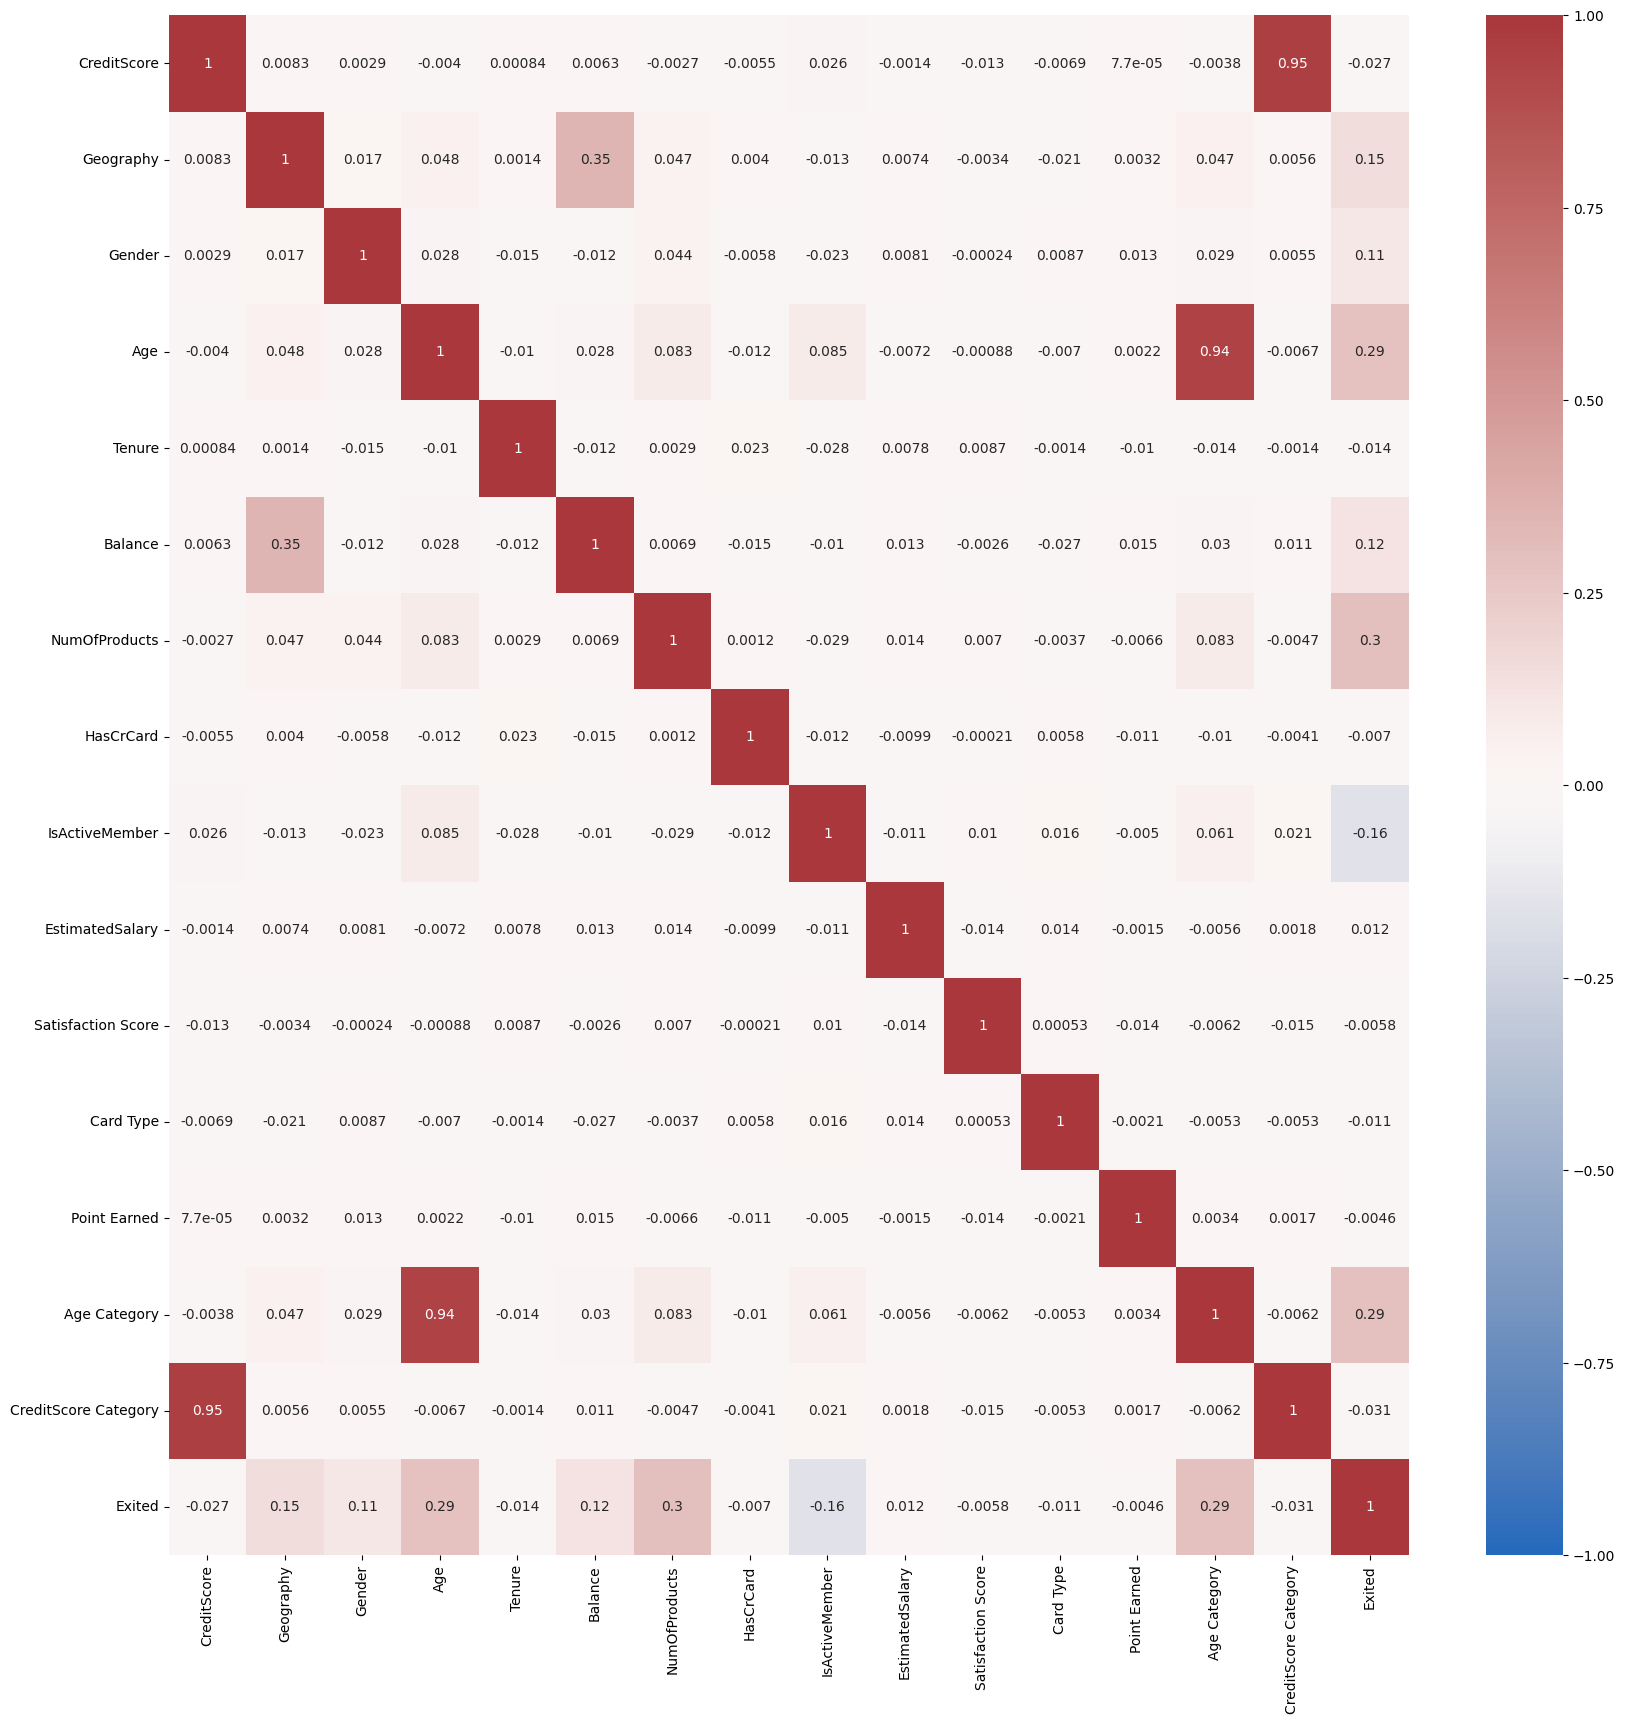

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only= True),
           vmin=-1,
           vmax=1,
           cmap=sns.color_palette("vlag", as_cmap=True),
           annot=True);

### 5.2. Visualizamos boxplots para cada variable en función de la variable objetivo 'Exited'. Cada boxplot compara las distribuciones de valores para las clases 'Exited' = 1 y 'Not Exited' = 0.

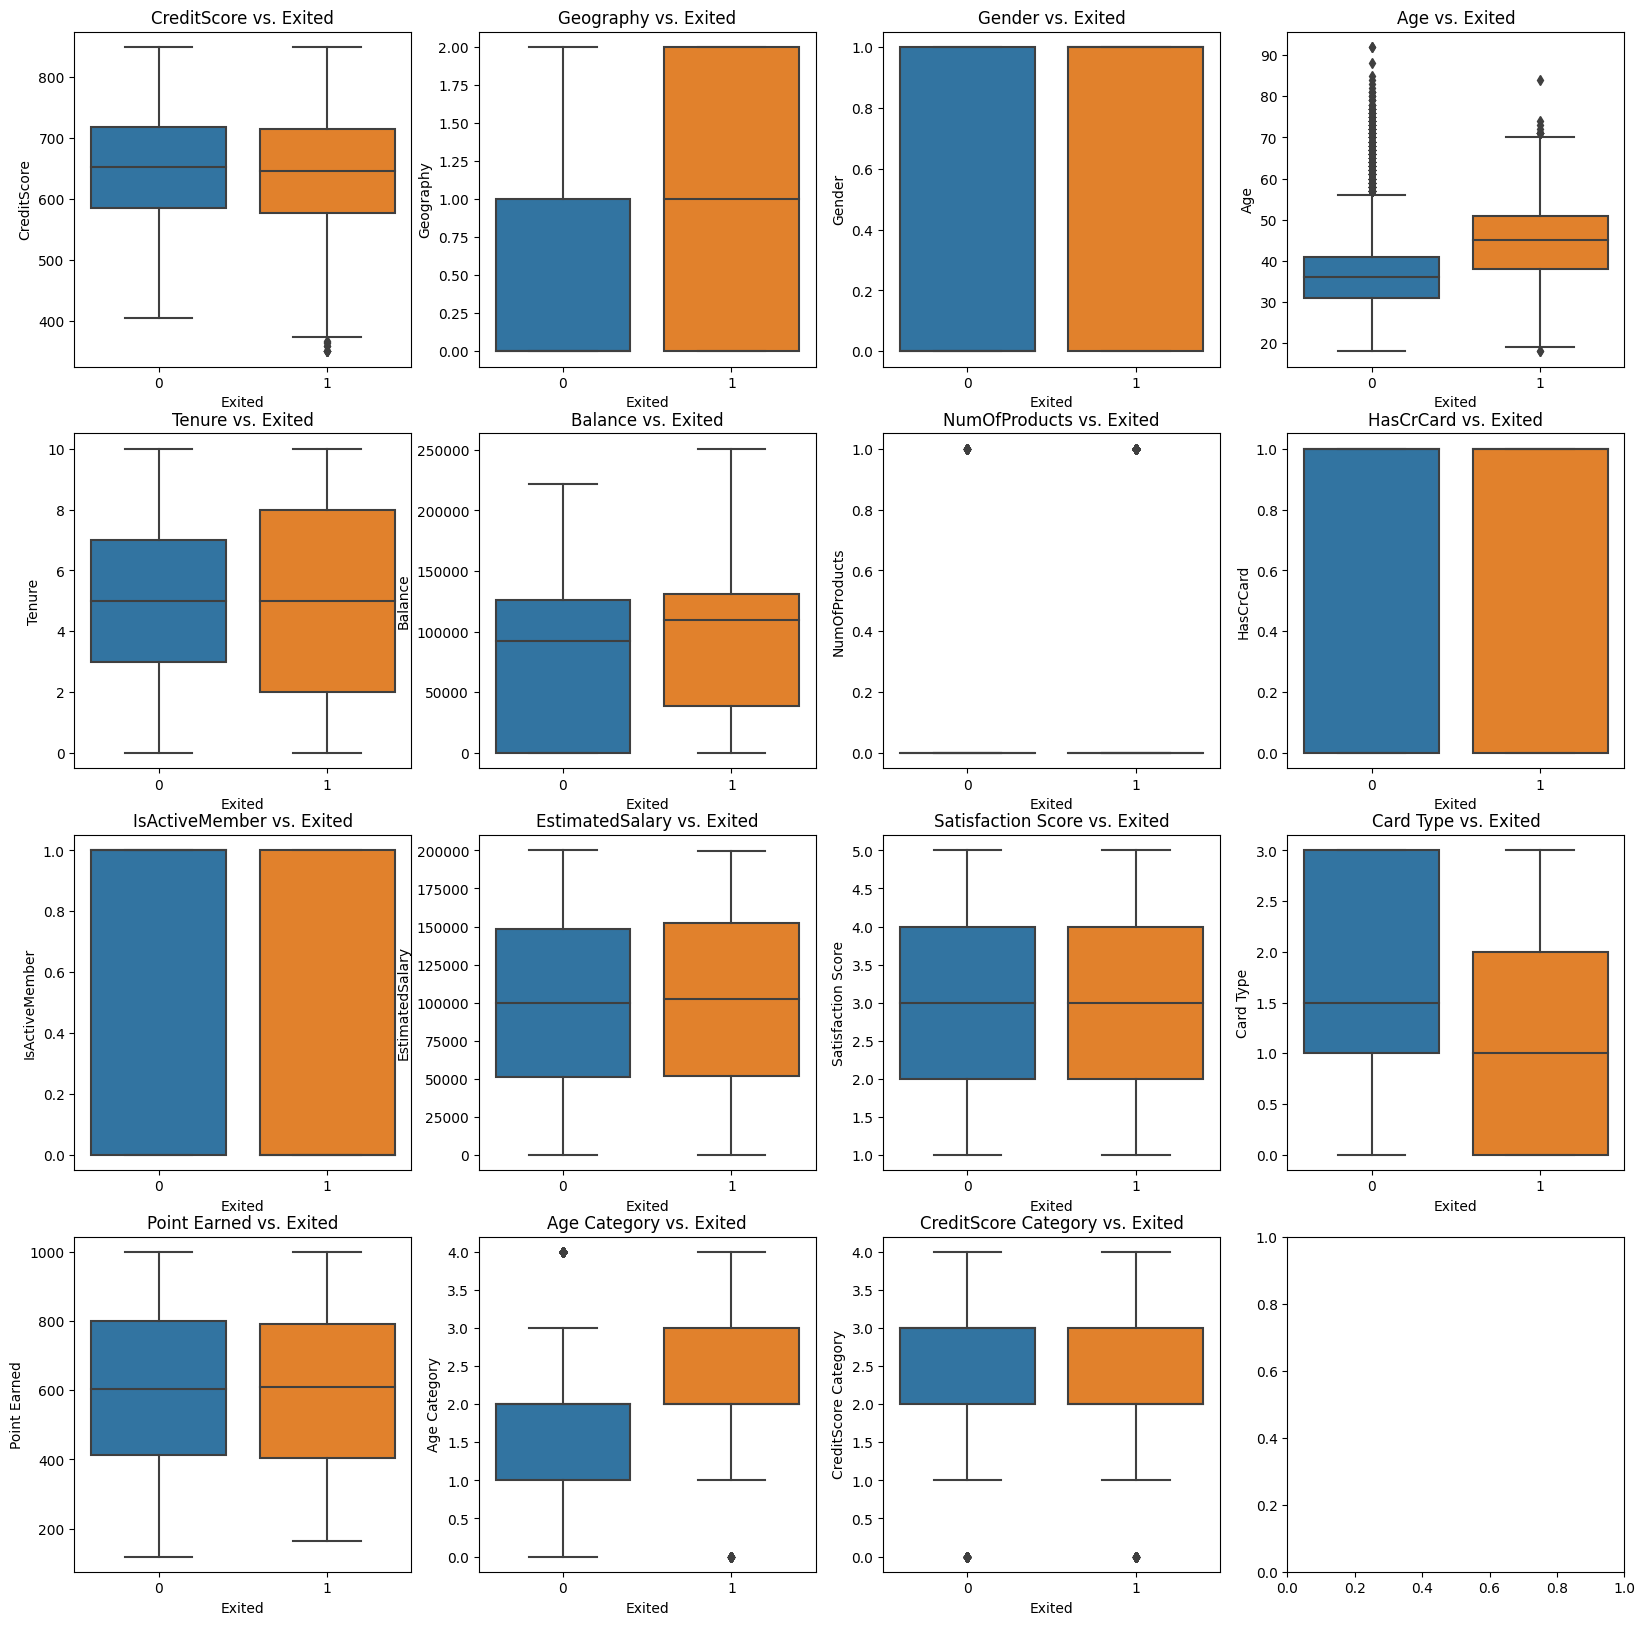

In [71]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

columns_for_analysis = df.columns[df.columns != 'Exited']

for i, column in enumerate(columns_for_analysis):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x='Exited', y=column, data=df, ax=ax)

    ax.set_title(f'{column} vs. Exited')


### 5.3. Visualizamos gráficos de densidad  para comprobar la distribución de cada variable en función de la variable objetivo 'Exited'.

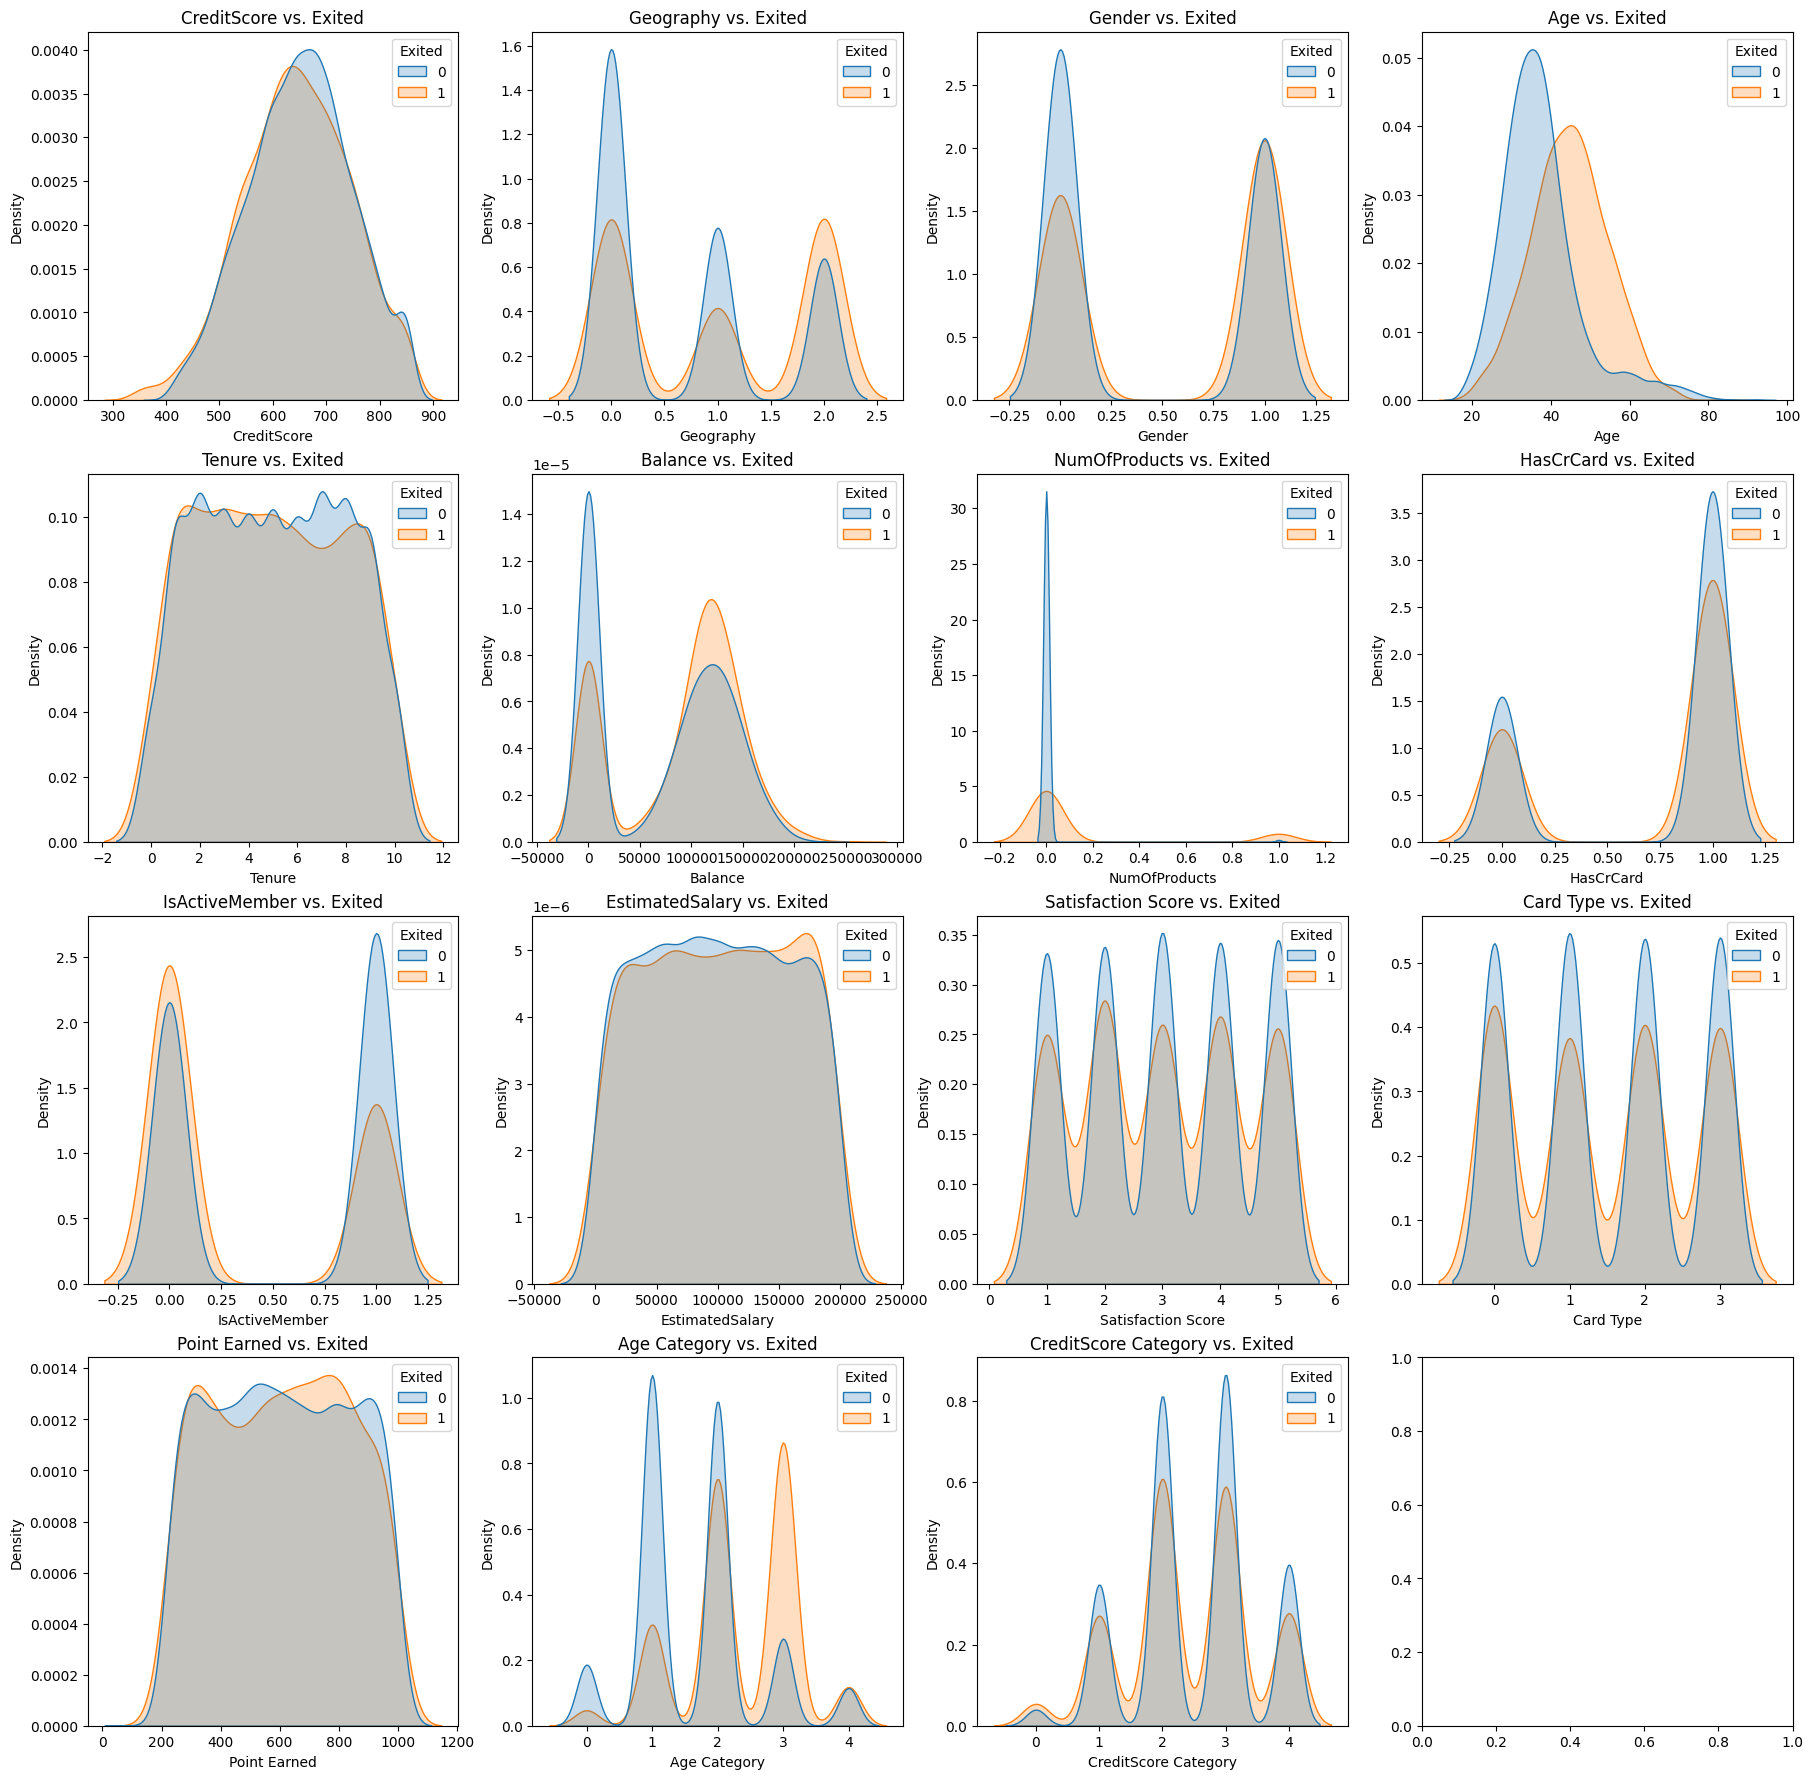

In [72]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(22, 22))

columns_for_analysis = df.columns[df.columns != 'Exited']

for i, column in enumerate(columns_for_analysis):
    ax = axes[i // 4, i % 4]
    sns.kdeplot(data=df, x=column, hue='Exited', fill=True, common_norm=False, ax=ax)

    ax.set_title(f'{column} vs. Exited')


# 6. Decisiones finales respecto a las Features.

- Ahora debemos decidir tras el procesamiento y exploración de los datos que varibales deben mantenerse en el Dataset Final para trabajar con los modelos de Machine Learning.

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
0,619,0,1,42,2,0.00,0,1,1,101348.88,2,0,464,2,2,1
1,608,1,1,41,1,83807.86,0,0,1,112542.58,3,0,456,2,2,0
2,502,0,1,42,8,159660.80,1,1,0,113931.57,3,0,377,2,1,1
3,699,0,1,39,1,0.00,0,0,0,93826.63,5,1,350,2,3,0
4,850,1,1,43,2,125510.82,0,1,1,79084.10,5,1,425,2,4,0


In [74]:
df.dtypes

CreditScore               int64
Geography                 int64
Gender                    int64
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Satisfaction Score        int64
Card Type                 int64
Point Earned              int64
Age Category              int64
CreditScore Category      int64
Exited                    int64
dtype: object

- Las Variables 'Geography', 'Gender','NumOfProducts','Card Type' han sido trabajadas con el fin de modificar su tipo de datos y categoría para los modelos de ML.

In [75]:
df[['Geography', 'Gender','NumOfProducts','Card Type']].head()

,Geography,Gender,NumOfProducts,Card Type
0,0,1,0,0
1,1,1,0,0
2,0,1,1,0
3,0,1,0,1
4,1,1,0,1


- Eliminamos las variables de 'Age' y 'CreditScore', puesto que hemos creado categorías para estas: 'Age Category' y 'CreditScore Category'. Lo cual ayudará también a entender el problema para negocio y su tratamiento.

In [76]:
print(df[["CreditScore", "Age"]].head())
print("-" * 40)
print(df[['Age Category','CreditScore Category']].head())


   CreditScore  Age
0          619   42
1          608   41
2          502   42
3          699   39
4          850   43
----------------------------------------
   Age Category  CreditScore Category
0             2                     2
1             2                     2
2             2                     1
3             2                     3
4             2                     4


In [77]:
df.drop(columns=["CreditScore", "Age"], inplace = True)

# 7. Dataset Final

In [78]:
df.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
0,0,1,2,0.00,0,1,1,101348.88,2,0,464,2,2,1
1,1,1,1,83807.86,0,0,1,112542.58,3,0,456,2,2,0
2,0,1,8,159660.80,1,1,0,113931.57,3,0,377,2,1,1
3,0,1,1,0.00,0,0,0,93826.63,5,1,350,2,3,0
4,1,1,2,125510.82,0,1,1,79084.10,5,1,425,2,4,0


In [79]:
df.describe()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Age Category,CreditScore Category,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.749500,0.454300,5.012800,76485.889288,0.032600,0.70550,0.515100,100090.239881,3.013800,1.498000,606.515100,1.781100,2.485100,0.203800
std,0.830433,0.497932,2.892174,62397.405202,0.177596,0.45584,0.499797,57510.492818,1.405919,1.118356,225.924839,0.949249,0.984518,0.402842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,1.000000,0.000000,119.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,2.000000,0.000000,410.000000,1.000000,2.000000,0.000000
50%,0.000000,0.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,3.000000,1.000000,605.000000,2.000000,3.000000,0.000000
75%,2.000000,1.000000,7.000000,127644.240000,0.000000,1.00000,1.000000,149388.247500,4.000000,2.000000,801.000000,2.000000,3.000000,0.000000
max,2.000000,1.000000,10.000000,250898.090000,1.000000,1.00000,1.000000,199992.480000,5.000000,3.000000,1000.000000,4.000000,4.000000,1.000000


# 8. Guardamos Dataset Final que hemos analizado y procesado para crear los modelos de ML

## 8.1. Guardado en Data_processed

In [80]:
df.to_csv("../data_processed/Churn_processed.csv", index = False)

## 8.2. Dividimos el Dataset Final procesado en **train y test**:
- De esta forma podremos entrenar los modelos con "Train" y posteriormente evaluarlos con nuevos datos de "Test".


8.2.1. **Train**
- Es el 80% del Dataset Final.

In [81]:
df_train = df.iloc[:8000, :]
df_train.to_csv("../data_processed/Train_Churn_processed.csv", index = False)

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geography             8000 non-null   int64  
 1   Gender                8000 non-null   int64  
 2   Tenure                8000 non-null   int64  
 3   Balance               8000 non-null   float64
 4   NumOfProducts         8000 non-null   int64  
 5   HasCrCard             8000 non-null   int64  
 6   IsActiveMember        8000 non-null   int64  
 7   EstimatedSalary       8000 non-null   float64
 8   Satisfaction Score    8000 non-null   int64  
 9   Card Type             8000 non-null   int64  
 10  Point Earned          8000 non-null   int64  
 11  Age Category          8000 non-null   int64  
 12  CreditScore Category  8000 non-null   int64  
 13  Exited                8000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 875.1 KB


8.2.2. **Test**
- Es el 20% del Dataset Final.

In [83]:
df_test = df.iloc[8000:, :]
df_test.to_csv("../data_processed/Test_Churn_processed.csv", index = False)

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 8000 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geography             2000 non-null   int64  
 1   Gender                2000 non-null   int64  
 2   Tenure                2000 non-null   int64  
 3   Balance               2000 non-null   float64
 4   NumOfProducts         2000 non-null   int64  
 5   HasCrCard             2000 non-null   int64  
 6   IsActiveMember        2000 non-null   int64  
 7   EstimatedSalary       2000 non-null   float64
 8   Satisfaction Score    2000 non-null   int64  
 9   Card Type             2000 non-null   int64  
 10  Point Earned          2000 non-null   int64  
 11  Age Category          2000 non-null   int64  
 12  CreditScore Category  2000 non-null   int64  
 13  Exited                2000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 218.9 KB
